#### Задача:
Классификация новостных заголовков по отношению к компаниям

#### Дано:
- Наивный байесовский классификатор текстов

#### Требуется:
- Выбрать тематику текстов для классификации (например, научить модель отличать спортивные тексты от всех остальных)
- Выбрать источники и методы сбора открытых данных (например, тематические сайты и библиотеки парсинга текстов, или социальная сеть ВКонтакте с ее API)
- собрать достаточную для классификации подборку текстов (от сотни; чем больше и разнообразнее, тем лучше)
- выбрать методы и библиотеки предобработки текстов
- произвести обучение модели и выгрузить словари во внешний pkl файл
- проверить результаты классификации на тестовых текстах
- подготовить следующие файлы для отправки:
1) pkl файл со словарями
2) код программы (который можно протестировать с произвольными тестовыми текстами)
3) отчет в произвольной форме о проделанной работе doc/ipynb (выбор тематики, источников, методов обработки текстов, объем обучающей выборки...)

<div align="right">Выполнил: Устинов Константин 05-804</div>

#### Часть 1. Сбор данных

Получение последних новостей с сайта https://finviz.com для нескольких компаний из технологического:
> Facebook, Apple, Amazon, Tesla, AMD, Nvidia, Synopsys, Google, Netflix, Yandex

и нефтегазового сектора:
> Occidental Petroleum, ExxonMobil, Chevron, Ovintiv Inc, Apache, ConocoPhillips, Phillips 66, DCP Midstream LP Unit, Energy Select Sector SPDR Fund, California Resources Corp

Необходимые библиотеки:
- requests - библиотека для HTTP-запросов
- bs4 - BeautifulSoup - библиотека для работы с html-документами

In [2]:
#!pip install requests
#!pip install bs4

In [3]:
# Импорты
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from urllib.request import urlopen
from urllib.request import Request

# Параметры 
n = 100 # Кол-во последних новостей для каждой компании 
# Список интересующих нас компаний технологческого сектора
tech_tickers = ['FB', 'AAPL', 'AMZN', 'TSLA', 'AMD', 'NVDA','SNPS','GOOGL','NFLX', 'YNDX']
# Список интересующих нас компаний нефтегазового сектора
oil_tickers = ['OXY', 'XOM', 'CVX', 'OVV', 'APA', 'COP','PSX','DCP','XLE','CRC'] 

Получение данных:

In [4]:
def parce_news(tickers, label):
    
    finviz_url = 'https://finviz.com/quote.ashx?t='
    news_tables = {}

    for ticker in tickers:
        url = finviz_url + ticker
        req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
        resp = urlopen(req)    
        html = BeautifulSoup(resp, features="lxml")
        news_table = html.find(id='news-table')
        news_tables[ticker] = news_table
        df = []
    
    try:
        for ticker in tickers:
            data = news_tables[ticker]
            data_tr = data.findAll('tr')
            print ('\n')
            print ('Last news {}: '.format(ticker))
            date, time = '', ''
            for i, table_row in enumerate(data_tr):
                a_text = table_row.a.text
                td_text = table_row.td.text
                td_text = td_text.strip()
                if i == 0:
                    date = td_text.split()[0]
                    time = td_text.split()[1]
                else: 
                    time = td_text
                print('[',i,'] ',a_text,'(',date, time,')')
                df += [[a_text, label]]
                if i == n-1:
                    break
                    
        return df
    except KeyError:
        print("Error: failed to get data.")

tech_df = parce_news(tech_tickers, 0)
oil_df = parce_news(oil_tickers, 1)



Последние новости FB: 
[ 0 ]  Nvidia CEO: The metaverse will be 'much, much bigger than the physical world' ( Nov-12-21 12:42PM )
[ 1 ]  Nvidia CEO Huang: AI is the most powerful technology force the world has known ( Nov-12-21 11:10AM )
[ 2 ]  TME, FB & HMLP - Class Action Updates: Bronstein, Gewirtz & Grossman, LLC ( Nov-12-21 11:00AM )
[ 3 ]  FB ALERT - Nationally Ranked Shareholder Rights Firm Labaton Sucharow Notifies Meta Platforms, Inc. f/k/a Facebook, Inc. (NASDAQ:FB) Investors of Securities Class Action ( Nov-12-21 11:00AM )
[ 4 ]  SHAREHOLDER ALERT: Levi & Korsinsky, LLP Notifies Shareholders of Meta Platforms, Inc. f.k.a. Facebook, Inc. of a Class Action Lawsuit and a Lead Plaintiff Deadline of December 27, 2021 - FB ( Nov-12-21 10:28AM )
[ 5 ]  INVESTOR ACTION ALERT: The Schall Law Firm Reminds Investors of a Class Action Lawsuit Against Meta Platforms, Inc. f/k/a Facebook, Inc. and Encourages Investors with Losses in Excess of $100,000 to Contact the Firm ( Nov-12-21 09:

[ 82 ]  A Fast-Growing Tech Stock to Buy in November ( Nov-12-21 10:13AM )
[ 83 ]  Goldman Sachs Crushes Expectations Once Again ( Nov-12-21 08:56AM )
[ 84 ]  Dow Jones Futures Rise, Tesla Stock Falls After Elon Musk Wins 'Approval' To Sell 10% Of Stake ( Nov-12-21 08:14AM )
[ 85 ]  Is Apple Stock A Buy Ahead Of Holiday Shopping Season? ( Nov-12-21 07:40AM )
[ 86 ]  Is Pinterest Stock a Buy? ( Nov-12-21 07:00AM )
[ 87 ]  Google Stock Hits Record High, Joins Apple, Microsoft in $2 Trillion Club ( Nov-12-21 06:07AM )
[ 88 ]  10 Large-Cap Stocks to Buy According to Matthew Tewksburys Stevens Capital ( Nov-12-21 04:48AM )
[ 89 ]  Tesla shares sink as Twitter users back Musk's 10% stock sale ( Nov-12-21 04:09AM )
[ 90 ]  Raleigh hotelier bets on northwest Cary  and Apple is a reason why ( Nov-12-21 Nov-07-21 12:15PM )
[ 91 ]  'This one is next'  here's why WallStreetBets founder Jaime Rogozinski is tapping Trump's new SPAC as the clear meme trade of the day ( Nov-12-21 09:50AM )
[ 92 ]  3 S

[ 69 ]  5 Reasons Shiba Inu Can Head Higher, and the Big Reason It Should Be Avoided ( Nov-12-21 06:06AM )
[ 70 ]  Tesla shares rise as Musk sells $5bn worth of stock after Twitter poll ( Nov-12-21 04:33AM )
[ 71 ]  How to Ride Tesla Stock in a Greedy Options Market ( Nov-12-21 04:30AM )
[ 72 ]  Elon Musk Sells $5 Billion Worth of Tesla Shares. The Stock Is Rising. ( Nov-12-21 04:02AM )
[ 73 ]  Tesla shares rise after Musk's $5 billion stock sale ( Nov-12-21 02:23AM )
[ 74 ]  Stocks Rebound, Musk Sells Tesla Shares, Beyond Meat Plunges, Rivian Leaps - 5 Things You Must Know ( Nov-12-21 01:04AM )
[ 75 ]  AMC Entertainment Chief Unloads Shares, Stock Tanks ( Nov-12-21 12:19AM )
[ 76 ]  A Made in America tax credit  what car buyers considering a Tesla, Rivian or other EVs need to know about Build Back Better ( Nov-12-21 12:07AM )
[ 77 ]  Elon Musk Sells Around $5 Billion in Tesla Stock ( Nov-12-21 Nov-10-21 11:44PM )
[ 78 ]  Elon Musk has sold roughly $5 billion in Tesla stock this week, 

[ 56 ]  Dow Jones Falls As Bitcoin Hits Record High; Palantir, PayPal Dive On Earnings ( Nov-12-21 09:57AM )
[ 57 ]  Luminar Wins Nvidia Business in Self-Driving Deal. Its a Big Moment for the Lidar Maker. ( Nov-12-21 08:22AM )
[ 58 ]  10 Best Stocks of 2021 ( Nov-12-21 08:10AM )
[ 59 ]  Semiconductor Sales Soar in Q3 on Increased Demand: 5 Winners ( Nov-12-21 07:09AM )
[ 60 ]  Luminar Wins Nvidia Business in Self-Driving Deal. Its a Big Win for the Lidar Maker. ( Nov-12-21 07:00AM )
[ 61 ]  General Electric, Nvidia, Robinhood & PayPal In Focus As Dow Slides - Stock Market Live ( Nov-12-21 05:25AM )
[ 62 ]  Nvidia doubles down on software tools for crafting virtual worlds ( Nov-12-21 04:41AM )
[ 63 ]  Nvidia targets automakers' 2024 models with driver-assistance hardware system ( Nov-12-21 04:38AM )
[ 64 ]  Nvidia launches new products to plug cars, factories into its Omniverse ( Nov-12-21 04:34AM )
[ 65 ]  Nvidia's Omniverse is being used to predict forest fires, set up cell networks,

[ 43 ]  Google loses challenge against EU antitrust ruling, $2.8-billion fine ( Nov-12-21 05:18AM )
[ 44 ]  $4.3-billion class action against Google blocked by UK Supreme Court ( Nov-12-21 05:12AM )
[ 45 ]  Google wins appeal against £3 billion privacy case that could have allowed users to claim money from search giant ( Nov-12-21 05:09AM )
[ 46 ]  Supreme Court rules in favour of Google in covert data collection judgment ( Nov-12-21 05:08AM )
[ 47 ]  Southeast Asia Digital Economy to Reach $363 Billion by 2025 ( Nov-12-21 03:51AM )
[ 48 ]  Alphabet Drifts Lower After Losing EU Fine Appeal ( Nov-12-21 12:52AM )
[ 49 ]  The OUTstanding Top 100 Future Leaders 2021 ( Nov-12-21 Nov-09-21 07:01PM )
[ 50 ]  Why The Trade Desk Stock Rallied Again on Tuesday ( Nov-12-21 04:55PM )
[ 51 ]  Citing Apple and Google, Dallas developer plots 940 new homes in Harnett County as area booms ( Nov-12-21 01:25PM )
[ 52 ]  Google launches new feature to find your pets lookalike in historical paintings ( Nov

[ 93 ]  Russian watchdog opens case against Yandex over alleged competition law breach ( Nov-10-21 12:09PM )
[ 94 ]  Yandex to Announce First Quarter 2021 Financial Results on April 28th ( Nov-10-21 Apr-08-21 04:30AM )
[ 95 ]  Is YNDX Stock A Buy or Sell? ( Nov-10-21 Apr-07-21 07:59AM )
[ 96 ]  Russia's Yandex seeks more time to respond to allegation it broke competition law ( Nov-10-21 Apr-01-21 12:28PM )
[ 97 ]  Yandex Announces Management Changes ( Nov-10-21 Mar-30-21 02:20AM )
[ 98 ]  Sberbank and Mail.ru on brink of divorce in $1.6bn tech joint venture ( Nov-10-21 Mar-28-21 08:00PM )
[ 99 ]  Yandex's (NASDAQ:YNDX) Wonderful 338% Share Price Increase Shows How Capitalism Can Build Wealth ( Nov-10-21 Mar-23-21 09:47AM )


Последние новости OXY: 
[ 0 ]  Best Growth Stocks to Buy for November 12th ( Nov-12-21 10:37AM )
[ 1 ]  Zacks.com featured highlights include: Tesla, Occidental Petroleum, Gartner and Diamondback Energy ( Nov-12-21 Nov-11-21 06:37AM )
[ 2 ]  Breakthrough Green Tech

[ 42 ]  Why These 10 Stocks Trended This Week ( Nov-11-21 11:52AM )
[ 43 ]  Oil Majors Wont Come Running to Help World Facing Energy Crunch ( Nov-11-21 09:30AM )
[ 44 ]  Why rising prices are really about humanity versus nature ( Nov-11-21 05:36AM )
[ 45 ]  Chevron (CVX) Q3 2021 Earnings Call Transcript ( Nov-11-21 02:01AM )
[ 46 ]  Why These 10 Stocks Are Trending on Friday ( Nov-11-21 Oct-29-21 04:41PM )
[ 47 ]  Oil, Gas Rally Lifts Chevrons Quarterly Profit To 8-Year-High ( Nov-11-21 02:30PM )
[ 48 ]  Exxon and Chevron Are Flush With Cash Again. What They Plan to Do. ( Nov-11-21 01:35PM )
[ 49 ]  Chevron Swings to a Profit on Higher Oil Prices. The Stock Is Rising. ( Nov-11-21 01:03PM )
[ 50 ]  Exxon, Chevron stocks gain as Wall Street cheers earnings and Exxons massive share buyback ( Nov-11-21 12:36PM )
[ 51 ]  Dow Jones Turns Positive Despite Apple Drop, But Amazon Stock Pressures Nasdaq ( Nov-11-21 12:22PM )
[ 52 ]  Exxon, Chevron Eye Billions in Buybacks as Cash Flows Surge ( N

[ 29 ]  Bezoss Space Base Coexists Uneasily With Middle-of-Nowhere Town ( Nov-05-21 10:44AM )
[ 30 ]  EnerCom's 26th The Oil & Gas Conference® Brings A Broad Group Of Public And Private Energy Companies, Energy Analysts, Industry Leaders And Investors To Denver, Aug. 15-18, 2021 ( Nov-05-21 Jul-14-21 03:39PM )
[ 31 ]  Apache Corporation Opens Application for 2021-2022 Tree Grant Program ( Nov-05-21 Jun-14-21 02:55PM )
[ 32 ]  APA CORPORATION INVESTIGATION INITIATED by Former Louisiana Attorney General: Kahn Swick & Foti, LLC Investigates the Officers and Directors of APA Corporation - APA ( Nov-05-21 Jun-11-21 10:50PM )
[ 33 ]  APA Corporation Declares Cash Dividend on Common Shares ( Nov-05-21 May-27-21 04:15PM )
[ 34 ]  Should Shareholders Reconsider APA Corporation's (NASDAQ:APA) CEO Compensation Package? ( Nov-05-21 May-20-21 06:07AM )
[ 35 ]  APA Corporation (NASDAQ:APA) Just Beat Earnings: Here's What Analysts Think Will Happen Next ( Nov-05-21 May-09-21 03:08AM )
[ 36 ]  The Onl

[ 78 ]  How Hurricane Ida will impact the oil markets ( Nov-12-21 04:23PM )
[ 79 ]  Oil Stages Strong Recovery ( Nov-12-21 Aug-27-21 03:00PM )
[ 80 ]  ConocoPhillips Director R.A. Walker Makes Largest Insider-Stock Purchase in Years ( Nov-12-21 01:58PM )
[ 81 ]  Should Invesco S&P Ultra Dividend Revenue ETF (RDIV) Be on Your Investing Radar? ( Nov-12-21 06:20AM )
[ 82 ]  Why Theres Trouble Ahead for Oil Refiners ( Nov-12-21 Aug-26-21 11:50AM )
[ 83 ]  Phillips 66 (PSX) in Talks to Divest Its Alliance Refinery ( Nov-12-21 09:38AM )
[ 84 ]  NVNXF: Strategic Phillips 66 Relationship Validates & Enhances Prospects ( Nov-12-21 Aug-24-21 11:00AM )
[ 85 ]  3 Battery Companies That Could Make Bank on the Electric Vehicle Surge ( Nov-12-21 08:45AM )
[ 86 ]  Why Energy Stocks Are Down This Week ( Nov-12-21 Aug-19-21 02:20PM )
[ 87 ]  Oil Stocks Rattled by Rising Gasoline Supplies, Delta Scare ( Nov-12-21 07:41AM )
[ 88 ]  Deals by Chesapeake, Viper Energy & Phillips 66 Dominate Oil & Gas Stock R

[ 27 ]  California Resources Stock Shows Market Leadership With Jump To 91 RS Rating ( Nov-11-21 Jun-08-21 02:40PM )
[ 28 ]  California Resources Corp (CRC) Q1 2021 Earnings Call Transcript ( Nov-11-21 May-13-21 04:30PM )
[ 29 ]  California Resources Corp. to Host Earnings Call ( Nov-11-21 09:15AM )
[ 30 ]  California Resources Corporation Announces First Quarter 2021 Results and $150 Million Share Repurchase Program ( Nov-11-21 09:00AM )
[ 31 ]  California Resources Corporation Announces Additional Investor Conference Participation ( Nov-11-21 Apr-21-21 05:35PM )
[ 32 ]  California Resources Corporation Schedules First Quarter 2021 Conference Call and Earnings Release, and Announces Investor Conference Participation ( Nov-11-21 Apr-15-21 04:15PM )
[ 33 ]  California Resources Corporation Announces Appointment of New Chair of the Board ( Nov-11-21 04:05PM )
[ 34 ]  California Resources Corporation Announces Appointment of Permanent CEO ( Nov-11-21 Mar-22-21 04:30PM )
[ 35 ]  California

Подготовка тестовой и обучающей выборки:

In [5]:
import random
train_test_ratio = 0.8 # 80% - train 20% - test

random.shuffle(tech_df)
tech_train = tech_df[:round(len(tech_df)*train_test_ratio)]
tech_test = tech_df[round(len(tech_df)*train_test_ratio):]

random.shuffle(oil_df)
oil_train = oil_df[:round(len(oil_df)*train_test_ratio)]
oil_test = oil_df[round(len(oil_df)*train_test_ratio):]

print('------------Dataset info-------------')
print('Class Tech: {} - train, {} - test'.format(len(tech_train),len(tech_test)))
print('Class Oil: {} - train, {} - test'.format(len(oil_train),len(oil_test)))

train = tech_train + oil_train
test = tech_test + oil_test
print('Summary: {} - train, {} - test'.format(len(train),len(test)))

------------Dataset info-------------
Class Tech: 800 - train, 200 - test
Class Oil: 766 - train, 192 - test
Summary: 1566 - train, 392 - test


Примеры данных:

In [12]:
print(train[14])
print(test[230])

['Synopsys and TSMC Drive Chip Innovation with Development of Broadest IP Portfolio on TSMC N4P Process', 0]
['3 Robinhood Stocks With High Dividend Yields', 1]


#### Часть 2. Препроцессинг данных
Natural Language Toolkit (nltk) - пакет библиотек и программ для символьной и статистической обработки естественного языка.
С помощью данного пакета будут произведены:
- токенизация предложений (RegexpTokenizer)
- стемминг токенов (WordNetLemmatizer)
- удаление стоп-слов

In [149]:
#!pip install nltk

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

In [14]:
def prepare_data(dataset):
    result = dataset.copy()
    for i in range(len(dataset)):
        tokens = tokenizer.tokenize(dataset[i][0])
        processed = []
        for token in tokens:
            if token not in nltk.corpus.stopwords.words('english'):
                processed += [wordnet_lemmatizer.lemmatize(token.lower())]
        result[i][0] = processed
    return result

prepared_train = prepare_data(train)
prepared_test = prepare_data(test)

#### Часть 3. Обучение модели

In [15]:
import numpy as np
import pickle

class NaiveBayesClf:
    
    def __init__(self, alpha=0.01):
        self.classes = {}
        self.freq = {}
        self.total_in_class = {}
        self.total = set()
        self.alpha = alpha
    
    def fit(self, dataset):
        self.dataset = dataset
        for features, label in self.dataset:
            if label not in self.classes:
                self.classes[label] = 0
                self.total_in_class[label] = 0
            self.classes[label] += 1
            for feature in features:
                if (feature, label) not in self.freq:
                    self.freq[(feature, label)] = 0
                self.freq[(feature, label)] += 1
                self.total_in_class[label] += 1
                self.total.add(feature)
    
        for feature, label in self.freq:
            self.freq[(feature, label)] = (self.alpha + self.freq[(feature, label)])/(self.alpha*len(self.total) + self.total_in_class[label])
        for cls in self.classes:
            self.classes[cls] /= len(self.dataset)
        return self
        

    def predict(self, features):
        return max(self.classes.keys(), 
                   key = lambda cls: np.log10(self.classes[cls]) + \
                   sum(np.log10(self.freq.get((feature, cls), self.alpha/(self.alpha*len(self.total)+self.total_in_class[cls])))\
                                                                             for feature in features))
    
    def save(self, path:str):
        dump = {
            'classes':self.classes,
            'freq':self.freq,
            'total_in_class':self.total_in_class,
            'total':self.total,
            'alpha':self.alpha
        }
        with open(path, 'wb') as f:
            pickle.dump(dump, f)
        print("Model has been saved by following path: {}".format(path))
            
    def load(self, path:str):

        with open(path, 'rb') as f:
            dump = pickle.load(f)
        self.classes = dump['classes']
        self.freq = dump['freq']
        self.total_in_class = dump['total_in_class']
        self.total = dump['total']
        self.alpha = dump['alpha']
        return self

In [16]:
model = NaiveBayesClf(0.1).fit(prepared_train)

Сохранение модели:

In [17]:
model.save("news-model.pkl")

Model has been saved by following path: news-model.pkl


Точечное предсказание модели:

In [21]:
tokens = tokenizer.tokenize("S&P 500 Ekes Record Close Above 4,700 as Bulls Ride Melt-Up in Materials")
processed = []
for token in tokens:
    if token not in nltk.corpus.stopwords.words('english'):
        processed += [wordnet_lemmatizer.lemmatize(token.lower())]

print("Tech" if model.predict(processed) == 0 else "Oil")  # 0 - tech, 1 - oil

Tech


Точность на обучающей выборке:

In [19]:
all_pred = 0
true_pred = 0
for i in range(len(prepared_train)):
    if prepared_train[i][1] == model.predict(prepared_train[i][0]):
        true_pred += 1
    all_pred += 1

print("Accuracy on the training sample: {:.2f}%".format(true_pred/all_pred))

Accuracy on the training sample: 0.99%


Точность на тестовой выборке

In [20]:
all_pred = 0
true_pred = 0
for i in range(len(prepared_test)):
    if prepared_test[i][1] == model.predict(prepared_test[i][0]):
        true_pred += 1
    all_pred += 1

print("Accuracy on the test sample: {:.2f}%".format(true_pred/all_pred))

Accuracy on the test sample: 0.93%


Проверка для различных значений $\alpha$:

In [27]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = []
test_accuracy = []

for alpha in np.arange(1,0.01,-0.02):
    model = NaiveBayesClf(alpha).fit(prepared_train)
    # train
    all_pred = 0
    true_pred = 0
    for i in range(len(prepared_train)):
        if prepared_train[i][1] == model.predict(prepared_train[i][0]):
            true_pred += 1
        all_pred += 1
    train_accuracy += [true_pred/all_pred]  
    # test
    all_pred = 0
    true_pred = 0
    for i in range(len(prepared_test)):
        if prepared_test[i][1] == model.predict(prepared_test[i][0]):
            true_pred += 1
        all_pred += 1
    test_accuracy += [true_pred/all_pred]

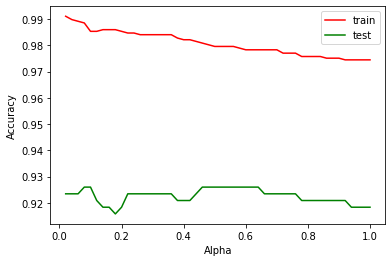

In [28]:
plt.plot(np.arange(1, 0.01,-0.02),train_accuracy, color='r', label='train')
plt.plot(np.arange(1, 0.01,-0.02),test_accuracy, color='g', label='test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()